## Business Understanding

Permasalahan Bisnis : </br>
Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

Tujuan : </br>
Membuat model machine learning yang dapat mendeteksi siswa yang akan drop out untuk mempersiapkan Jaya Jaya Institut agar melakukan bimbingan dan pelatihan kepada siswa tersebut.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv', sep=';')

## Data Understanding

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Shape and Info
print(df.shape)
display(df.info())

(4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 n

None

Terdapat 37 kolom dan 4424 baris di dataset. Selain itu, tipe data di dataset juga sudah diubah ke format numerik, kecuali untuk kolom Status yang masih dalam format teks.

In [ ]:
# Descriptive Statistics
display(df.describe())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Deksriptif statistik penting untuk mengetahui distribusi persebaran data di dataset. Hal tersebut penting untuk mendeteksi outlier

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


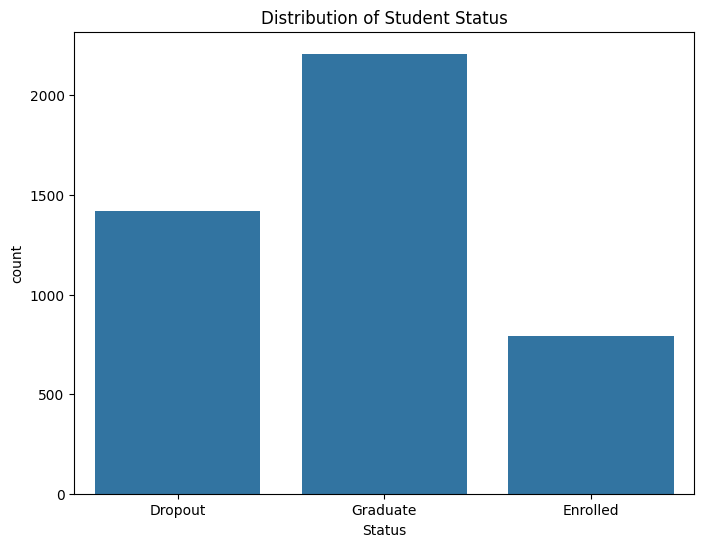

In [ ]:
# Target Variable Analysis
status_counts = df['Status'].value_counts()
print(status_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Student Status')
plt.show()

Bisa terlihat bahwa distribusi status siswa tidak terlalu balance, namun tida parah

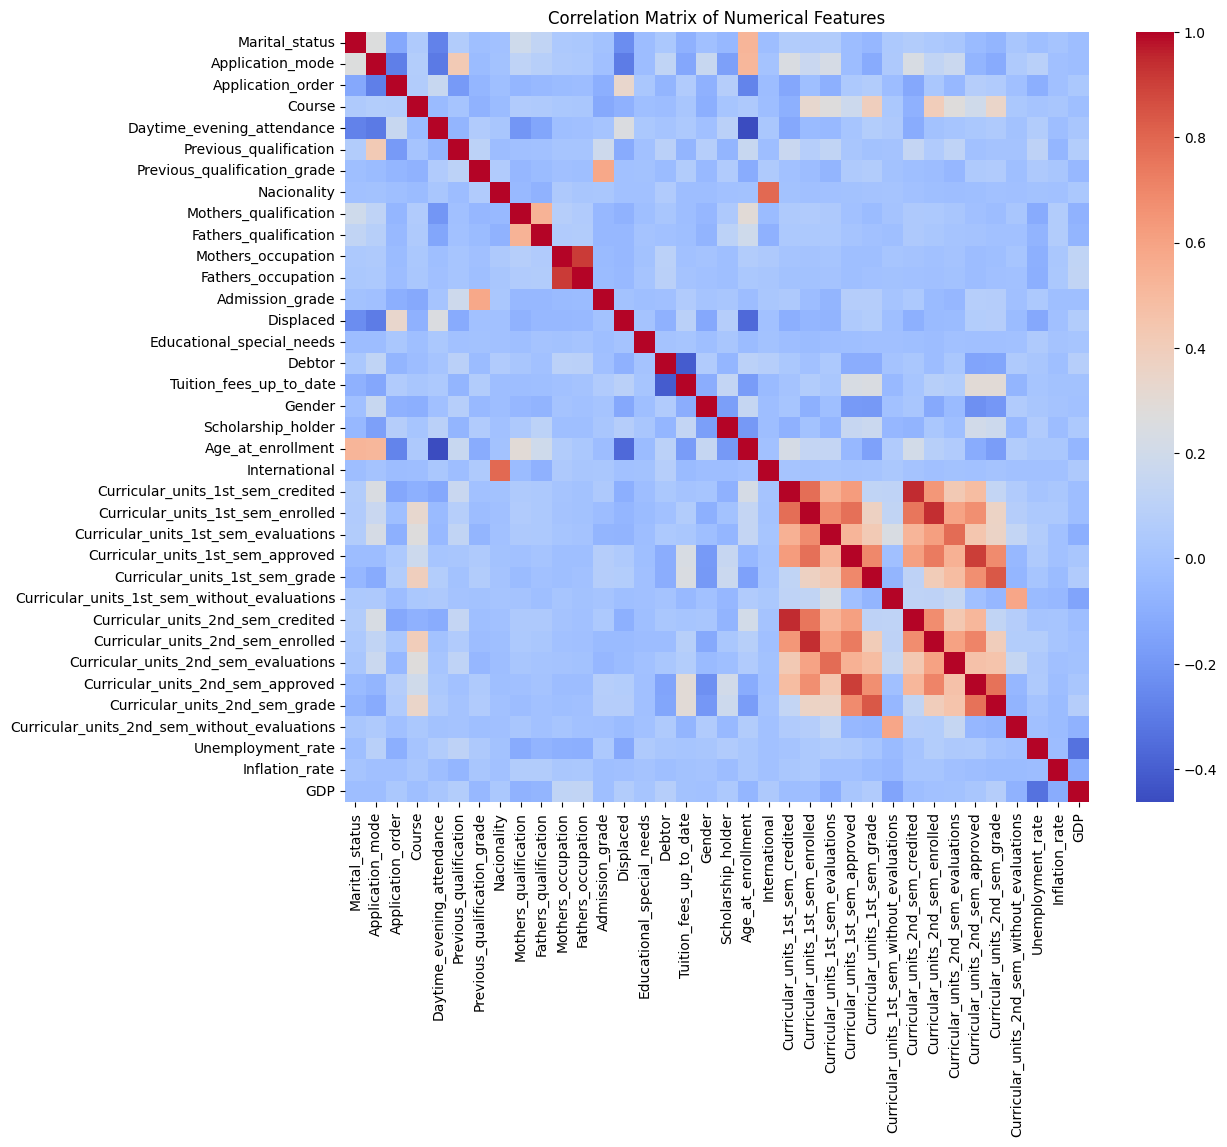

In [ ]:
# Correlation Analysis
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Gambar tersebut menunjukkan adanya hubungan positif yang kuat antar fitur akademik, khususnya antara jumlah mata kuliah yang diambil, dievaluasi, disetujui, dan nilai rata-rata, baik pada semester pertama maupun kedua. Hal ini wajar karena semakin banyak mata kuliah yang diambil, biasanya semakin banyak pula yang dievaluasi dan disetujui, serta berpotensi menghasilkan nilai rata-rata yang lebih tinggi. Sebaliknya, fitur-fitur ekonomi seperti GDP, tingkat inflasi, dan tingkat pengangguran menunjukkan korelasi yang sangat rendah terhadap fitur lainnya, yang mengindikasikan bahwa kondisi makroekonomi tidak memiliki hubungan linear yang signifikan dengan karakteristik atau kinerja mahasiswa secara individu. Demikian pula, fitur latar belakang keluarga seperti pekerjaan orang tua dan kualifikasi pendidikan mereka umumnya juga tidak menunjukkan hubungan linear yang kuat dengan fitur akademik atau demografis mahasiswa. Meskipun demikian, terdapat beberapa korelasi negatif yang relatif lemah seperti antara kebutuhan pendidikan khusus dengan performa akademik, yang mungkin menunjukkan adanya kecenderungan penurunan kinerja pada mahasiswa dengan kebutuhan khusus.

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


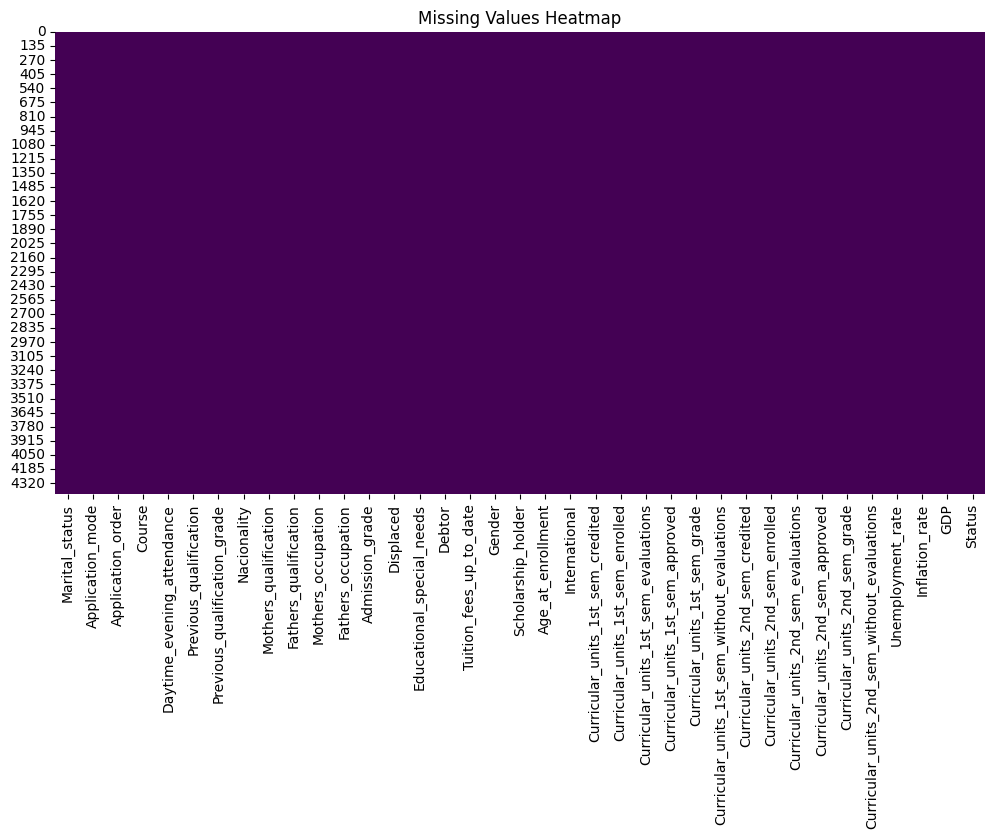

In [ ]:
# Missing Values
missing_values = df.isnull().sum()
print(missing_values)

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Tidak ada missing value yang terlihat di dataset

# Data Preparation

Pertama tama, saya akan menghilangkan outlier dan mengubah tipe data di kolom status ke numerik

In [ ]:
# Exclude students who are currently enrolled
df = df[df['Status']!='Enrolled']

# Outlier detection and treatment
# Calculate z-scores for 'Admission_grade'
df['Admission_grade_zscore'] = np.abs((df['Admission_grade'] - df['Admission_grade'].mean()) / df['Admission_grade'].std())

# Identify outliers based on z-score threshold (z-score > 3)
outliers = df[df['Admission_grade_zscore'] > 3]

# Winsorizing outliers (capping at 99th percentile)
upper_limit = df['Admission_grade'].quantile(0.99)
df['Admission_grade'] = np.where(df['Admission_grade'] > upper_limit, upper_limit, df['Admission_grade'])

# Remove temporary z-score column
df.drop('Admission_grade_zscore', axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

# check mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

<ipython-input-7-64874cb07f20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admission_grade_zscore'] = np.abs((df['Admission_grade'] - df['Admission_grade'].mean()) / df['Admission_grade'].std())
<ipython-input-7-64874cb07f20>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admission_grade'] = np.where(df['Admission_grade'] > upper_limit, upper_limit, df['Admission_grade'])
<ipython-input-7-64874cb07f20>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

{'Dropout': np.int64(0), 'Graduate': np.int64(1)}


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Custom transformer untuk feature engineering
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Fitur baru
        X['avg_grade'] = (X['Curricular_units_1st_sem_grade'] + X['Curricular_units_2nd_sem_grade']) / 2
        X['avg_approved'] = (X['Curricular_units_1st_sem_approved'] + X['Curricular_units_2nd_sem_approved']) / 2
        X['approval_rate_1st'] = X['Curricular_units_1st_sem_approved'] / X['Curricular_units_1st_sem_enrolled'].replace(0, np.nan)
        X['approval_rate_2nd'] = X['Curricular_units_2nd_sem_approved'] / X['Curricular_units_2nd_sem_enrolled'].replace(0, np.nan)
        X['parental_education_avg'] = (X['Fathers_qualification'] + X['Mothers_qualification']) / 2
        X['parental_occupation_avg'] = (X['Fathers_occupation'] + X['Mothers_occupation']) / 2
        X['low_income_flag'] = ((X['Scholarship_holder'] == 1) & (X['Tuition_fees_up_to_date'] == 0)).astype(int)
        X['foreign_and_displaced'] = ((X['International'] == 1) | (X['Displaced'] == 1)).astype(int)
        X['no_eval_first_sem'] = (X['Curricular_units_1st_sem_without_evaluations'] > 0).astype(int)
        X['no_eval_second_sem'] = (X['Curricular_units_2nd_sem_without_evaluations'] > 0).astype(int)

        # Handle NaN values by filling with 0
        X.fillna(0, inplace=True) # or consider other imputation strategies

        return X

# Custom transformer untuk drop kolom
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_drop):
        self.cols_to_drop = cols_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.cols_to_drop)


Dalam tahap feature engineering, dilakukan pembuatan sejumlah fitur turunan untuk menangkap informasi yang lebih kaya dari data asli. Pertama, dihitung rata-rata nilai mahasiswa dari dua semester (avg_grade) dan rata-rata jumlah mata kuliah yang disetujui (avg_approved) sebagai representasi umum performa akademik. Selain itu, dihitung pula tingkat kelulusan per semester, yaitu rasio antara mata kuliah yang disetujui dengan yang diambil pada semester pertama (approval_rate_1st) dan kedua (approval_rate_2nd), untuk menggambarkan efisiensi belajar mahasiswa. Latar belakang orang tua juga disatukan melalui fitur rata-rata kualifikasi pendidikan (parental_education_avg) dan rata-rata jenis pekerjaan (parental_occupation_avg), yang dapat menunjukkan latar sosial-ekonomi mahasiswa. Sebuah indikator status ekonomi rendah (low_income_flag) dibuat berdasarkan kondisi mahasiswa yang menerima beasiswa namun belum membayar uang kuliah, yang bisa menandakan kesulitan finansial. Kemudian, fitur gabungan foreign_and_displaced dibuat untuk menandai mahasiswa yang merupakan pelajar internasional atau mahasiswa yang mengalami pemindahan tempat tinggal, dua kelompok yang mungkin menghadapi tantangan tambahan. Terakhir, dua fitur biner ditambahkan untuk mengindikasikan apakah ada mata kuliah yang tidak dievaluasi pada semester pertama (no_eval_first_sem) atau kedua (no_eval_second_sem), yang dapat mencerminkan ketidakhadiran atau kendala akademik lainnya.

In [ ]:
# Delete original columns
cols_to_drop = [
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled',
    'Fathers_qualification', 'Mothers_qualification',
    'Fathers_occupation', 'Mothers_occupation',
    'International', 'Displaced',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations'
]

# Modeling

Karena kolom di dataset merupakan kolom yang secara nature itu kolom kategorikal dan numerikal, maka model yang sesuai adalah tree based model. Saya menggunakan random forest dan gradient boosting karena kedua model tersebut berbasis tree based model

In [ ]:
# Split target and features
X = df.drop('Status', axis=1)
y = df['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Create complete pipeline
def build_pipeline(model):
    return Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('feature_dropper', FeatureDropper(cols_to_drop)),
        ('model', model)
    ])

# Define model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


# Evaluation


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       284
           1       0.90      0.97      0.93       442

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



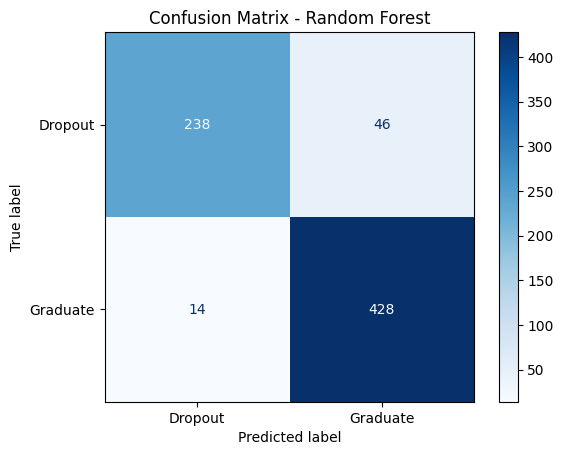

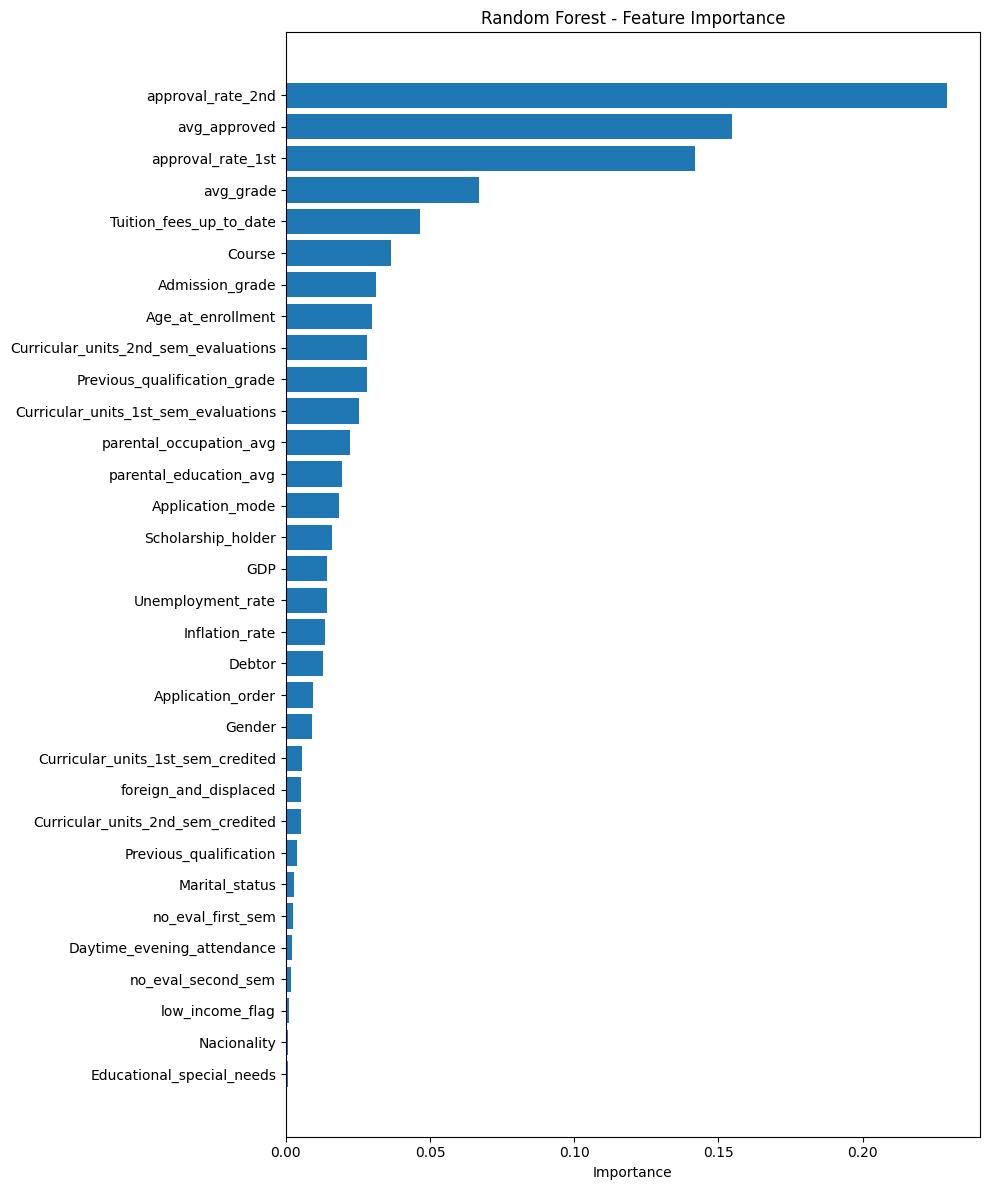


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       284
           1       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



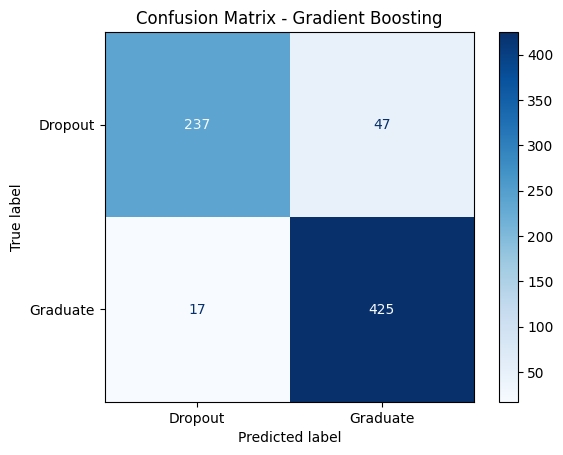

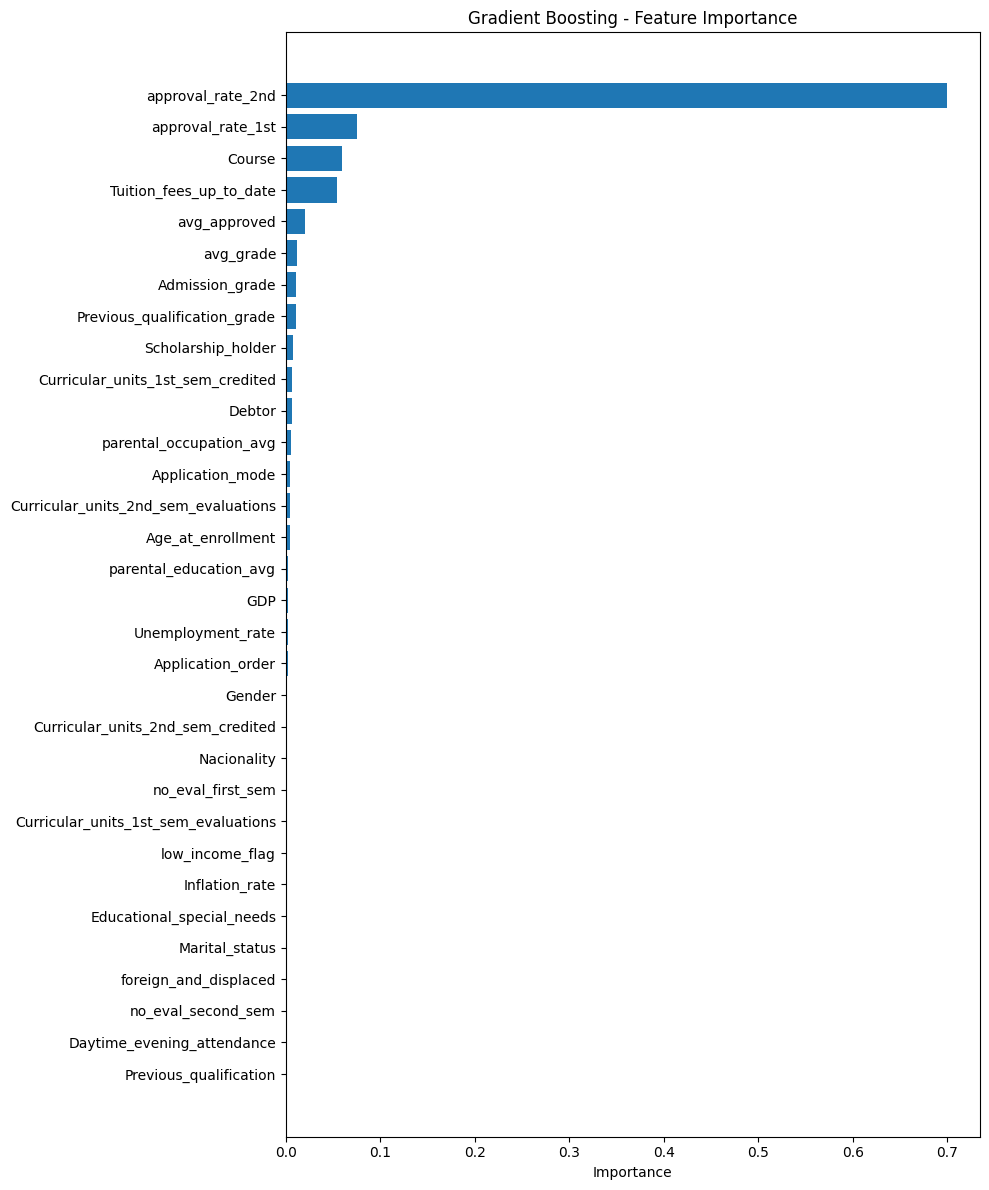

In [ ]:
# Evaluate model performance
for name, base_model in models.items():
    print(f"\n=== {name} ===")
    pipeline = build_pipeline(base_model)
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=base_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(base_model.classes_))
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Plot feature importance
    model_step = pipeline.named_steps['model']
    final_X = pipeline.named_steps['feature_dropper'].transform(
                pipeline.named_steps['feature_engineering'].transform(X_train))
    feature_names = final_X.columns if isinstance(final_X, pd.DataFrame) else X_train.drop(columns=cols_to_drop).columns
    importances = model_step.feature_importances_

    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(10, 12))
    plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
    plt.title(f"{name} - Feature Importance")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


Secara keseluruhan, model Random Forest menunjukkan performa yang sedikit lebih baik daripada Gradient Boosting dalam hal akurasi, presisi, recall, dan F1-score untuk kelas 'Dropout'. Hal ini menunjukkan bahwa Random Forest lebih efektif dalam mendeteksi siswa yang berpotensi dropout.

Alasan Random Forest Lebih Baik :

* Random Forest cenderung lebih robust terhadap overfitting dibandingkan Gradient Boosting, terutama ketika dataset memiliki banyak fitur.
* Random Forest dapat menangani data yang noisy dan missing values dengan lebih baik.
* Random Forest memiliki kemampuan generalisasi yang lebih baik, yang berarti model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.




Fitur-fitur yang paling penting dalam model Random Forest adalah:

1. avg_grade: Rata-rata nilai siswa dari dua semester. Fitur ini memiliki importance tertinggi, menunjukkan bahwa performa akademik secara keseluruhan merupakan faktor penting dalam memprediksi dropout.
2. Admission_grade: Nilai penerimaan siswa. Nilai penerimaan yang lebih rendah dapat mengindikasikan risiko dropout yang lebih tinggi.
3. approval_rate_1st: Tingkat kelulusan pada semester pertama. Tingkat kelulusan yang rendah di awal studi dapat menjadi tanda peringatan dini.
4. avg_approved: Rata-rata jumlah mata kuliah yang disetujui. Semakin sedikit mata kuliah yang disetujui, semakin tinggi risiko dropout.
5. approval_rate_2nd: Tingkat kelulusan pada semester kedua.
Gradient Boosting

Fitur-fitur yang paling penting dalam model Gradient Boosting serupa dengan Random Forest, tetapi dengan beberapa perbedaan:

1. avg_grade: Sama seperti Random Forest, rata-rata nilai siswa merupakan faktor terpenting.
2. Admission_grade: Nilai penerimaan juga penting dalam Gradient Boosting.
approval_rate_1st: Tingkat kelulusan semester pertama tetap menjadi faktor penting.
3. Tuition_fees_up_to_date: Status pembayaran uang kuliah. Siswa yang menunggak pembayaran uang kuliah cenderung memiliki risiko dropout yang lebih tinggi.
4. avg_approved: Rata-rata jumlah mata kuliah yang disetujui juga penting.
Kesimpulan

Secara umum, kedua model mengidentifikasi fitur-fitur yang serupa sebagai yang paling penting dalam memprediksi dropout. Performa akademik, nilai penerimaan, dan tingkat kelulusan di kedua semester merupakan faktor utama yang dipertimbangkan oleh kedua model.

# Deployment

Untuk mendeploy model di streamlit, saya simpan model random forest ke file pkl

In [ ]:
# Karena random forest adalah model terbaik, maka saya simpan buat dideploy
import joblib

for name, base_model in models.items():
    print(f"\n=== {name} ===")
    pipeline = build_pipeline(base_model)
    pipeline.fit(X_train, y_train)

    # Simpan model random forest

    if name == "Random Forest":
        # Simpan pipeline Random Forest yang sudah dilatih
        joblib.dump(pipeline, 'random_forest_pipeline.pkl')
        print(f"\nRandom Forest pipeline saved as random_forest_pipeline.pkl")

        # Simpan LabelEncoder yang sudah dilatih
        joblib.dump(le, 'label_encoder.pkl')
        print(f"Label Encoder saved as label_encoder.pkl")


=== Random Forest ===

Random Forest pipeline saved as random_forest_pipeline.pkl
Label Encoder saved as label_encoder.pkl

=== Gradient Boosting ===


Lalu, saya juga membuat dashboard di Tableau untuk memudahkan manajemen mendapatkan insight. Karena format kolom kategorikal di dataset masih menggunakan numerik, saya mengubah ke teks sesuai deskripsi di dataset sehingga lebih intuitif jika dibuat dashboard.

In [ ]:
# Convert numerical value in categorical columns to text for better visualisation in dashboard
marital_map = {
    1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
    5: 'Facto Union', 6: 'Legally Separated'
}

application_mode_map = {
    1: '1st phase - general contingent', 2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)', 7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99', 15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)', 17: '2nd phase - general contingent',
    18: '3rd phase - general contingent', 26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)', 39: 'Over 23 years old',
    42: 'Transfer', 43: 'Change of course', 44: 'Technological specialization diploma holders',
    51: 'Change of institution/course', 53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

course_map = {
    33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)', 9003: 'Agronomy',
    9070: 'Communication Design', 9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering', 9130: 'Equinculture',
    9147: 'Management', 9238: 'Social Service', 9254: 'Tourism',
    9500: 'Nursing', 9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management', 9773: 'Journalism and Communication',
    9853: 'Basic Education', 9991: 'Management (evening attendance)'
}

attendance_map = {1: 'Daytime', 0: 'Evening'}

prev_qual_map = {
    1: 'Secondary education', 2: "Higher education - bachelor's degree",
    3: 'Higher education - degree', 4: "Higher education - master's",
    5: 'Higher education - doctorate', 6: 'Frequency of higher education',
    9: '12th year of schooling - not completed', 10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling', 14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course', 40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course', 43: 'Higher education - master (2nd cycle)'
}

nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
    14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
    24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
    41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

parent_qual_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree", 3: "Higher Education - Degree",
    4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed", 11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling", 14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course", 26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed", 30: "8th year of schooling",
    34: "Unknown", 35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course", 40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course", 42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)", 44: "Higher Education - Doctorate (3rd cycle)",
    13: "2nd year complementary high school course", 20: "Complementary High School Course",
    25: "Complementary High School Course - not concluded",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration"
}

parent_job_map = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions", 4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers", 10: "Armed Forces Professions", 90: "Other Situation",
    99: "Null",
    122: "Health professionals", 123: "Teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff", 151: "Personal service workers",
    152: "Sellers", 153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "Cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    101: "Armed Forces Officers", 102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel", 112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    135: "Information and communication technology technicians",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    181: "Fixed plant and machine operators", 182: "Assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    195: "Street vendors (except food) and street service providers"
}

boolean_map = {1: 'Yes', 0: 'No'}
gender_map = {1: 'Male', 0: 'Female'}

# Make a copy of dataframe
df_mapped = df.copy()

# List the columns to map
columns_to_map = {
    'Marital_status': marital_map,
    'Application_mode': application_mode_map,
    'Course': course_map,
    'Daytime_evening_attendance': attendance_map,
    'Previous_qualification': prev_qual_map,
    'Nacionality': nationality_map,
    'Mothers_qualification': parent_qual_map,
    'Fathers_qualification': parent_qual_map,
    'Mothers_occupation': parent_job_map,
    'Fathers_occupation': parent_job_map,
    'Displaced': boolean_map,
    'Educational_special_needs': boolean_map,
    'Debtor': boolean_map,
    'Tuition_fees_up_to_date': boolean_map,
    'Gender': gender_map,
    'Scholarship_holder': boolean_map,
    'International': boolean_map
}

# Mapping the column with iteration
for column, mapping in columns_to_map.items():
    if column in df_mapped.columns: # Check if the column is exist in the dataframe
        df_mapped[column] = df_mapped[column].map(mapping)
        # Anda bisa menambahkan .fillna('Unknown') jika ingin menangani kode yang tidak ada di map
        # df_mapped[column] = df_mapped[column].map(mapping).fillna(f'Unknown Code in {column}')
    else:
        print(f"Peringatan: Kolom '{column}' tidak ditemukan dalam DataFrame.")

#Check the result
print("--- DataFrame Setelah Mapping (Teks Deskriptif) ---")
print(df_mapped.head())

print("\n--- Tipe Data Kolom Setelah Mapping ---")
print(df_mapped.dtypes)

--- DataFrame Setelah Mapping (Teks Deskriptif) ---
  Marital_status                  Application_mode  Application_order  \
0         Single    2nd phase - general contingent                  5   
1         Single  International student (bachelor)                  1   
2         Single    1st phase - general contingent                  5   
3         Single    2nd phase - general contingent                  2   
4        Married                 Over 23 years old                  1   

                                Course Daytime_evening_attendance  \
0      Animation and Multimedia Design                    Daytime   
1                              Tourism                    Daytime   
2                 Communication Design                    Daytime   
3         Journalism and Communication                    Daytime   
4  Social Service (evening attendance)                    Evening   

  Previous_qualification  Previous_qualification_grade Nacionality  \
0    Secondary education

In [ ]:
df_mapped.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
df_mapped.to_csv('data_mapped.csv', index=False)

In [ ]:
df_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   object 
 1   Application_mode                              3630 non-null   object 
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   object 
 4   Daytime_evening_attendance                    3630 non-null   object 
 5   Previous_qualification                        3630 non-null   object 
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Nacionality                                   3630 non-null   object 
 8   Mothers_qualification                         3630 non-null   object 
 9   Fathers_qualification                         3630 non-null   object